In [161]:
from chembl_webresource_client.new_client import new_client
from rdkit import Chem
import pandas as pd
import seaborn as sns
import numpy as np
import rdkit
import mols2grid
from rdkit.Chem import rdFingerprintGenerator
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples


In [3]:
target = new_client.target.search("sirtuin")
targt_df = pd.DataFrame.from_dict(target)


In [97]:
targt_df.head()

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Rattus norvegicus,Protein Sirt6,18.0,False,CHEMBL3621029,"[{'accession': 'Q4FZY2', 'component_descriptio...",SINGLE PROTEIN,10116
1,[],Homo sapiens,NAD-dependent protein deacetylase sirtuin-4,16.0,False,CHEMBL2163185,"[{'accession': 'Q9Y6E7', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Homo sapiens,NAD-dependent protein deacetylase sirtuin-6,15.0,False,CHEMBL2163182,"[{'accession': 'Q8N6T7', 'component_descriptio...",SINGLE PROTEIN,9606
3,[],Homo sapiens,Cereblon/SIRT6,15.0,False,CHEMBL4742301,"[{'accession': 'Q8N6T7', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
4,"[{'xref_id': 'Q8IXJ6', 'xref_name': None, 'xre...",Homo sapiens,NAD-dependent deacetylase sirtuin 2,14.0,False,CHEMBL4462,"[{'accession': 'Q8IXJ6', 'component_descriptio...",SINGLE PROTEIN,9606


In [10]:
select = targt_df['target_chembl_id'].iloc[4]    # i select fivth target with chembl iD: CHEMBL4462

In [11]:
activity = new_client.activity.search(select)
df_activity = pd.DataFrame.from_dict(activity)

In [30]:
df_activity_IC50 = df_activity[df_activity['standard_type'] == "IC50"]

In [68]:
df_activity.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1653909,[],CHEMBL859690,Inhibitory activity against recombinant human ...,B,None,None,BAO_0000190,...,Homo sapiens,NAD-dependent deacetylase sirtuin 2,9606,None,None,IC50,uM,UO_0000065,None,24.8
1,None,None,1657538,[],CHEMBL859744,Inhibitory activity against human SIRT2 at 100 uM,B,None,None,BAO_0000201,...,Homo sapiens,NAD-dependent deacetylase sirtuin 2,9606,None,None,Inhibition,%,UO_0000187,None,72.2
2,None,None,1657540,[],CHEMBL859744,Inhibitory activity against human SIRT2 at 100 uM,B,None,None,BAO_0000201,...,Homo sapiens,NAD-dependent deacetylase sirtuin 2,9606,None,None,Inhibition,%,UO_0000187,None,79.2
3,None,Not Determined,1657550,[],CHEMBL859744,Inhibitory activity against human SIRT2 at 100 uM,B,None,None,BAO_0000201,...,Homo sapiens,NAD-dependent deacetylase sirtuin 2,9606,None,None,Inhibition,None,UO_0000187,None,None
4,None,Not Determined,1657566,[],CHEMBL859745,Inhibitory activity against human SIRT2,B,None,None,BAO_0000190,...,Homo sapiens,NAD-dependent deacetylase sirtuin 2,9606,None,None,IC50,None,None,None,None


In [65]:
df_smiles = df_activity_IC50[['standard_type', 'standard_value', 'canonical_smiles']]

In [66]:
df_smiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1733 entries, 0 to 3938
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   standard_type     1733 non-null   object
 1   standard_value    1428 non-null   object
 2   canonical_smiles  1733 non-null   object
dtypes: object(3)
memory usage: 54.2+ KB


In [67]:
df_smiles.describe()

,standard_type,standard_value,canonical_smiles
count,1733,1428,1733
unique,1,768,1394
top,IC50,100000.0,NC(=O)C1CCCc2c1[nH]c1ccc(Cl)cc21
freq,1733,53,23


In [69]:
df_smiles.head()

,standard_type,standard_value,canonical_smiles
0,IC50,24800.0,NC(=O)C1CCCc2c1[nH]c1ccccc21
4,IC50,None,NC(=O)c1ccccc1/N=C/c1c(O)ccc2ccccc12
5,IC50,51000.0,O=C(/C=C/c1ccc(OCc2ccc(F)cc2)cc1)NC1(C(=O)NCCc...
6,IC50,50000.0,O=C1NC(=O)C2=C1c1cn(c3ccccc13)CCOC(C(O)CO)CCn1...
7,IC50,100000.0,CN1C(=O)C(c2cn(CCCCCCCO)c3ccccc23)=C(c2cn(CCCC...


In [70]:
df_smiles.isna().sum()

standard_type         0
standard_value      305
canonical_smiles      0
dtype: int64

In [71]:
df_smiles = df_smiles.dropna()

In [72]:
df_smiles.isna().sum()

standard_type       0
standard_value      0
canonical_smiles    0
dtype: int64

In [75]:
df_smiles = df_smiles.drop('standard_type', axis=1)

In [78]:
mols = [Chem.MolFromSmiles(x) for x in df_smiles['canonical_smiles']]
mols

 ...]

In [125]:
mols2grid.display(mols)

MolGridWidget()

In [104]:
fingerprints = []
for mol in mols:
    fingerprint = np.array(Chem.RDKFingerprint(mol))
    fingerprints.append(fingerprint)

In [105]:

kmeans = KMeans(n_clusters=10)
kmeans.fit(fingerprints)

cluster_labels = kmeans.labels_


In [142]:
score_list = []
for k in range(10, 40):
    km = KMeans(n_clusters=int(k), random_state=42, n_init=5)
    km.fit(fingerprints)
    cluster_labels=km.predict(fingerprints)
    score = silhouette_score(fingerprints, cluster_labels)
    score_list.append([int(k), score])

In [143]:
score_df = pd.DataFrame(score_list,columns=["K","Silhouette Score"])
score_df.sort_values('Silhouette Score', ascending=False)

,K,Silhouette Score
25,35,0.345624
29,39,0.338970
27,37,0.332825
26,36,0.329808
21,31,0.326364
24,34,0.323754
20,30,0.322803
28,38,0.316070
19,29,0.315915
18,28,0.315838


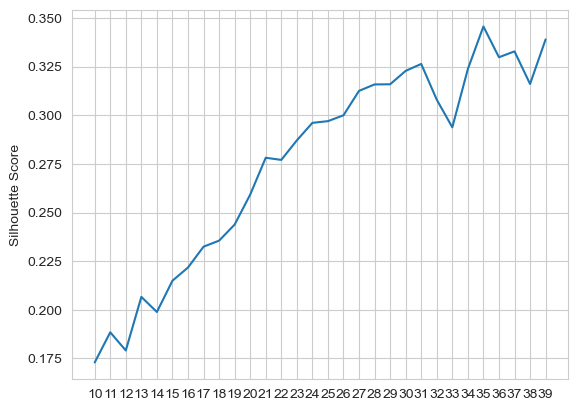

In [158]:
ax = sns.lineplot(x=range(10, 40),y="Silhouette Score",data=score_df)
ax.set_xticks(range(10, 40));

In [154]:
num_k = 34
opt_km = KMeans(n_clusters=num_k, random_state=42)
opt_km.fit(fingerprints)
label_opt = opt_km.predict(fingerprints)

In [155]:
def silhouette_plot(X,cluster_labels):
    """
    Adapted from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
    """
    sns.set_style('whitegrid')
    sample_df = pd.DataFrame(silhouette_samples(X,cluster_labels),columns=["Silhouette"])
    sample_df['Cluster'] = cluster_labels
    n_clusters = max(cluster_labels+1)
    color_list = [cm.nipy_spectral(float(i) / n_clusters) for i in range(0,n_clusters)]
    ax = sns.scatterplot()
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    silhouette_avg = silhouette_score(X, cluster_labels)
    y_lower = 10
    unique_cluster_ids = sorted(sample_df.Cluster.unique())
    for i in unique_cluster_ids:
        cluster_df = sample_df.query('Cluster == @i')
        cluster_size = len(cluster_df)
        y_upper = y_lower + cluster_size
        ith_cluster_silhouette_values = cluster_df.sort_values("Silhouette").Silhouette.values
        color = color_list[i]
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                    0, ith_cluster_silhouette_values,
                    facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * cluster_size, str(i),fontsize="small")
        y_lower = y_upper + 10
    ax.axvline(silhouette_avg,color="red",ls="--")
    ax.set_xlabel("Silhouette Score")
    ax.set_ylabel("Cluster")
    ax.set(yticklabels=[]) 
    ax.yaxis.grid(False) 

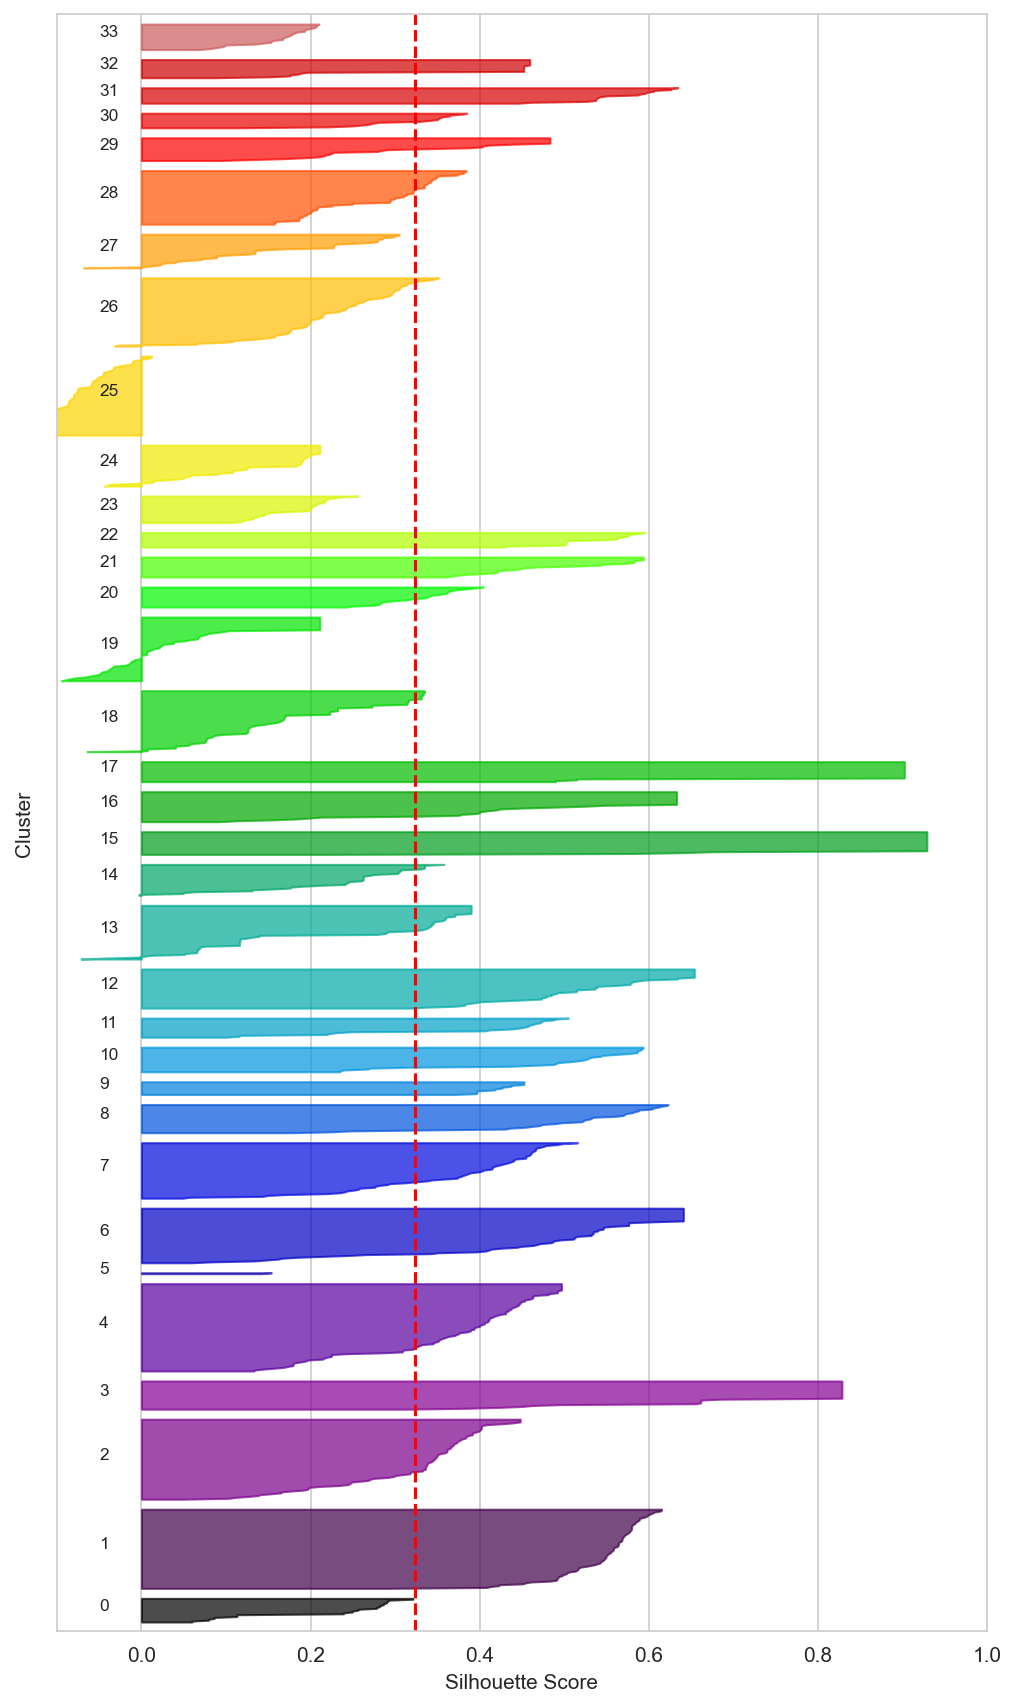

In [160]:
plt.figure(figsize=(8, 14), dpi=150)
silhouette_plot(fingerprints,label_opt)

In [168]:
df_smiles

,standard_value,canonical_smiles
0,24800.0,NC(=O)C1CCCc2c1[nH]c1ccccc21
5,51000.0,O=C(/C=C/c1ccc(OCc2ccc(F)cc2)cc1)NC1(C(=O)NCCc...
6,50000.0,O=C1NC(=O)C2=C1c1cn(c3ccccc13)CCOC(C(O)CO)CCn1...
7,100000.0,CN1C(=O)C(c2cn(CCCCCCCO)c3ccccc23)=C(c2cn(CCCC...
9,100000.0,CCCCCCCn1cc(C2=C(c3cn(CCCCCCC)c4ccccc34)C(=O)N...
...,...,...
3912,1.86,CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)NCc4cc...
3913,0.97,COc1cc(CC(=O)NCCOCCOCCNC(=O)c2cccc(-c3cccnc3)c...
3922,10000.0,Cl.Cn1cc(CN2CC3(CCN(c4ncc(C(=O)NO)cn4)C3)C2)c2...
3935,151000.0,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...
